# 머신러닝 모델 훈련 기법

In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"

## 최적화, 일반화, 과대적합

### 예제: MNIST 데이터셋과 화이트 노이즈

MNIST 데이터셋에 **화이트 노이즈**(white noise)이 포함된 데이터셋과 그렇지 않은 데이터셋을 활용해서
훈련된 두 모델의 성능을 비교한다.

**데이터셋 준비**

In [2]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

화이트 노이즈를 추가한 데이터셋을 준비한다.

In [3]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

화이트 노이즈가 들어간 샘플은 다음과 같이 보인다.

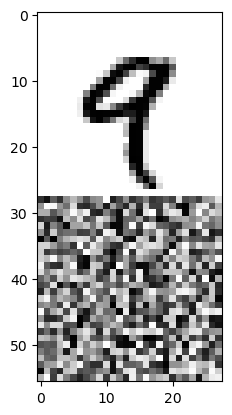

In [5]:
train_image_white4 = train_images_with_noise_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_white4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

0행렬을 추가하여 모양을 맞춘 데이터셋을 준비한다.

In [6]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [7]:
train_images_with_zeros_channels.shape

(60000, 1568)

영 행렬이 추가된 샘플은 다음과 같이 보인다.

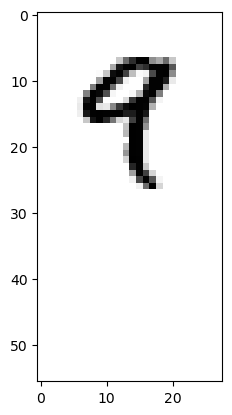

In [8]:
train_image_zeros4 = train_images_with_zeros_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_zeros4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**모델 지정**

모델 구성과 컴파일을 함수를 이용하여 지정한다.

- 정수 레이블을 사용하기에 손실함수로 `sparse_categorical_crossentropy` 지정한다.

In [9]:
import keras
from keras import layers

def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

**백색 잡음이 추가된 데이터셋 훈련**

`validation_split` 키워드 인자는 검증셋 비율을 지정할 때 사용한다.

In [10]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8633 - loss: 0.4422 - val_accuracy: 0.9062 - val_loss: 0.3020
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.9315 - loss: 0.2286 - val_accuracy: 0.9452 - val_loss: 0.1930
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.9541 - loss: 0.1542 - val_accuracy: 0.9519 - val_loss: 0.1658
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9672 - loss: 0.1105 - val_accuracy: 0.9585 - val_loss: 0.1446
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9770 - loss: 0.0786 - val_accuracy: 0.9607 - val_loss: 0.1315
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9572 - val_loss: 0.1389
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9882 - loss: 0.0411 - val_accuracy: 0.9622 - val_loss: 0.1293
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9935 - loss: 0.0272 - va

**영 행렬이 추가된 데이터셋 훈련**

In [11]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9153 - loss: 0.3009 - val_accuracy: 0.9543 - val_loss: 0.1610
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9641 - loss: 0.1268 - val_accuracy: 0.9648 - val_loss: 0.1194
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9755 - loss: 0.0832 - val_accuracy: 0.9717 - val_loss: 0.0955
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0.0594 - val_accuracy: 0.9749 - val_loss: 0.0828
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9871 - loss: 0.0436 - val_accuracy: 0.9745 - val_loss: 0.0830
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.0317 - val_accuracy: 0.9760 - val_loss: 0.0802
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9938 - loss: 0.0247 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9955 - loss: 0.0187 - val_accuracy

**훈련 결과 비교**

백색 잡음이 포함된 훈련셋을 이용한 모델의 정확도 성능이 1% 이상 낮다.

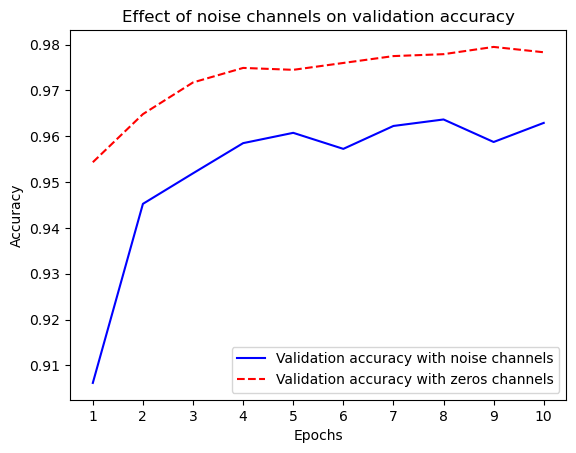

In [12]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b-",
    label="Validation accuracy with noise channels",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r--",
    label="Validation accuracy with zeros channels",
)
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝 모델의 외우기 능력: MNIST 모델과 임의로 섞은 라벨

아래 코드는 임의로 섞은 레이블을 이용하여 MNIST 손글씨 숫자를 예측하는 모델을 훈련시킨다. 

**데이터셋 준비**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

라벨(타깃)을 무작위로 섞는다.

In [14]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

**모델 구성 훈련**

매우 단순한 모델을 구성한 후에 훈련을 100 에포크 정도 시킨다.

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1045 - loss: 2.3145 - val_accuracy: 0.1072 - val_loss: 2.3063
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.1176 - loss: 2.2985 - val_accuracy: 0.1032 - val_loss: 2.3130
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.1275 - loss: 2.2913 - val_accuracy: 0.1039 - val_loss: 2.3155
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.1380 - loss: 2.2796 - val_accuracy: 0.1037 - val_loss: 2.3250
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.1491 - loss: 2.2640 - val_accuracy: 0.1012 - val_loss: 2.3303
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.1660 - loss: 2.2451 - val_accuracy: 0.1040 - val_loss: 2.3424
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.1790 - loss: 2.2219 - val_accuracy: 0.1042 - val_loss: 2.3559
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.1937 - loss: 2.1

훈련셋에 대한 성능은 훈련하면서 계속 향상된다.
반면에 검증셋에 성능은 당연히 전혀 향상되지 않는다.

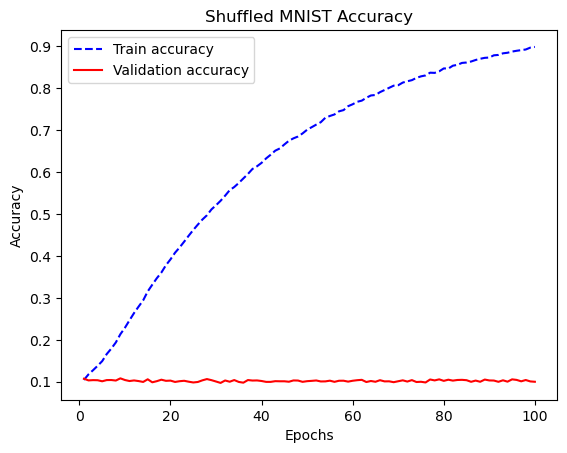

In [17]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, 101)

plt.plot(epochs, train_acc, "b--",
         label="Train accuracy")

plt.plot(epochs, val_acc, "r-",
         label="Validation accuracy")

plt.title("Shuffled MNIST Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## 모델 훈련 최적화

**첫째 경우: 경사하강법 관련 파라미터 조정**

_학습률 조정_

* MNIST 모델 훈련: 매우 큰 학습률 사용
    - 학습률: 1.0 (옵티마이저의 옵션에서 지정)
    - 훈련셋/검증셋에 대한 정확도가 30% 수준에 머무름.

In [18]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.0),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1150 - loss: 14.2334 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.1140 - loss: 14.2813 - val_accuracy: 0.1060 - val_loss: 14.4096
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.1140 - los

* MNIST 모델 훈련: 매우 작은 학습률 사용
    - 학습률: 0.000001
    - 검증셋에 대한 정확도가 느리게 증가함

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-6),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0975 - loss: 2.3242 - val_accuracy: 0.1315 - val_loss: 2.2722
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.1797 - loss: 2.2333 - val_accuracy: 0.2260 - val_loss: 2.1817
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2738 - loss: 2.1470 - val_accuracy: 0.3248 - val_loss: 2.0953
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3717 - loss: 2.0642 - val_accuracy: 0.4253 - val_loss: 2.0125
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.4607 - loss: 1.9850 - val_accuracy: 0.5113 - val_loss: 1.9331
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.5333 - loss: 1.9089 - val_accuracy: 0.5781 - val_loss: 1.8566
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.5859 - loss: 1.8355 - val_accuracy: 0.6287 - val_loss: 1.7828
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.6257 - loss: 1.7646 - va

* MNIST 모델 훈련: 적절한 학습률 사용
    - 학습률: 0.01
    - 제대로 훈련됨.

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9120 - loss: 0.3587 - val_accuracy: 0.9618 - val_loss: 0.1391
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.9638 - loss: 0.1280 - val_accuracy: 0.9639 - val_loss: 0.1384
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9736 - loss: 0.1003 - val_accuracy: 0.9673 - val_loss: 0.1545
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9785 - loss: 0.0867 - val_accuracy: 0.9699 - val_loss: 0.1530
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9815 - loss: 0.0753 - val_accuracy: 0.9707 - val_loss: 0.1814
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9849 - loss: 0.0657 - val_accuracy: 0.9716 - val_loss: 0.1814
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9875 - loss: 0.0555 - val_accuracy: 0.9725 - val_loss: 0.1746
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0494 - val_

**셋째 경우: 모델의 정보 저장 능력 조정**

* MNIST 데이터셋 다중클래스 분류: 매우 단순한 모델
    - 은닉층이 없이 출력층 하나만 사용하는 매우 단순한 모델.
    - 검증셋의 정확도: 93% 정도에서 정체
    - 검증셋의 손실값: 0.25 이하로 내려가지 않음.
    - 결론적으로 모델의 정보 저장/분석 능력이 떨어진다. 

In [22]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.6652 - val_accuracy: 0.9046 - val_loss: 0.3605
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.9023 - loss: 0.3531 - val_accuracy: 0.9122 - val_loss: 0.3108
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9111 - loss: 0.3180 - val_accuracy: 0.9181 - val_loss: 0.2943
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9160 - loss: 0.3016 - val_accuracy: 0.9214 - val_loss: 0.2830
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9175 - loss: 0.2922 - val_accuracy: 0.9228 - val_loss: 0.2781
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9198 - loss: 0.2853 - val_accuracy: 0.9256 - val_loss: 0.2744
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.9216 - loss: 0.2803 - val_accuracy: 0.9233 - val_loss: 0.2722
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9231 - loss: 0.2766 - va

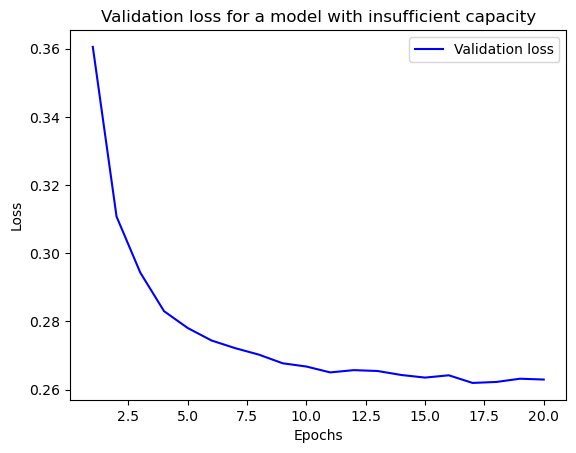

In [23]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with insufficient capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

* MNIST 데이터셋 다중클래스 분류: 훨씬 많은 저장/분석/표현 능력 모델
    - 두 개의 은닉층: 128개의 많은 유닛 사용
    - 잘 훈련되며 과대적합 발생 

In [24]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9035 - loss: 0.3361 - val_accuracy: 0.9536 - val_loss: 0.1617
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.9570 - loss: 0.1429 - val_accuracy: 0.9648 - val_loss: 0.1207
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9701 - loss: 0.0974 - val_accuracy: 0.9707 - val_loss: 0.1002
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9731 - val_loss: 0.0949
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.9722 - val_loss: 0.1020
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9862 - loss: 0.0446 - val_accuracy: 0.9747 - val_loss: 0.0946
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.9753 - val_loss: 0.0901
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9914 - loss: 0.0290 - va

8 에포크 정도 지나면서 일반화 성능이 떨어진다. 

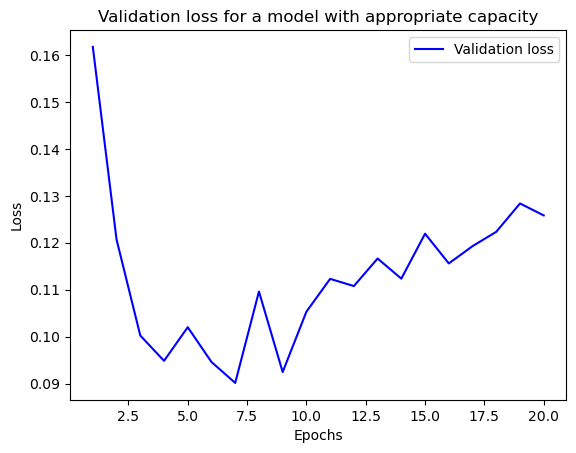

In [25]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 일반화 향상법

### 규제 적용

**규제 기법 1: 신경망 크기 축소**

아래 코드는 이전에 다루었던 IMDB 데이터셋을 이용한 모델 훈련이다. 

In [26]:
from keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.7713 - loss: 0.5510 - val_accuracy: 0.8690 - val_loss: 0.4185
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8897 - loss: 0.3460 - val_accuracy: 0.8528 - val_loss: 0.3647
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9144 - loss: 0.2621 - val_accuracy: 0.8837 - val_loss: 0.2952
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9293 - loss: 0.2112 - val_accuracy: 0.8857 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9413 - loss: 0.1786 - val_accuracy: 0.8746 - val_loss: 0.3117
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.1522 - val_accuracy: 0.8847 - val_loss: 0.2897
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1309 - val_accuracy: 0.8872 - val_loss: 0.2892
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.96

은닉층의 유닛수를 4로 만들어보자.

In [27]:
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_smaller_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7657 - loss: 0.5852 - val_accuracy: 0.8528 - val_loss: 0.4977
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8839 - loss: 0.4303 - val_accuracy: 0.8761 - val_loss: 0.4004
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.3411 - val_accuracy: 0.8806 - val_loss: 0.3486
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9216 - loss: 0.2829 - val_accuracy: 0.8871 - val_loss: 0.3133
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.2412 - val_accuracy: 0.8898 - val_loss: 0.2930
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.2103 - val_accuracy: 0.8917 - val_loss: 0.2833
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9457 - loss: 0.1856 - val_accuracy: 0.8928 - val_loss: 0.2757
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1659 - val_accuracy: 0.8859 - val_loss

기존 모델보다 과대적합이 늦게 발생한다.

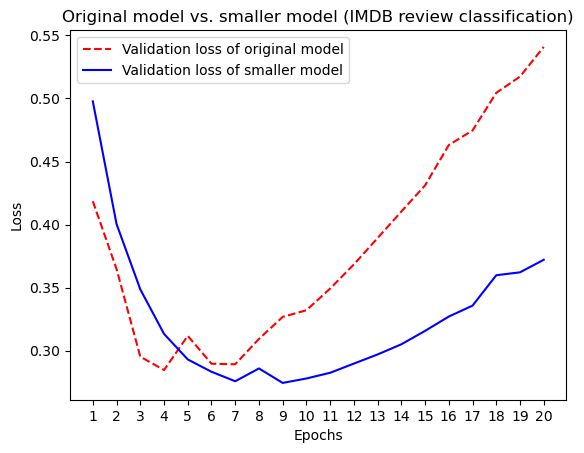

In [28]:
original_val_loss = history_original.history["val_loss"]
smaller_model_val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    smaller_model_val_loss,
    "b-",
    label="Validation loss of smaller model",
)
plt.title("Original model vs. smaller model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

이번엔 유닛 수를 크게 늘려보자.

In [29]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_larger_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7172 - loss: 0.5681 - val_accuracy: 0.8291 - val_loss: 0.3956
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8711 - loss: 0.3195 - val_accuracy: 0.8358 - val_loss: 0.3846
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9043 - loss: 0.2433 - val_accuracy: 0.8884 - val_loss: 0.2787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1802 - val_accuracy: 0.8179 - val_loss: 0.4957
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9435 - loss: 0.1470 - val_accuracy: 0.8834 - val_loss: 0.3149
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.1172 - val_accuracy: 0.8847 - val_loss: 0.2835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0808 - val_accuracy: 0.8851 - val_loss: 0.3513
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.0648 - val_accuracy: 0.8818 - val_loss

기존 모델과의 차이점은 다음과 같다.

- 과대적합이 매우 빠르게 발생하며, 검증셋에 대한 성능이 매우 불안정하다.

**주의사항**: 검증셋이 너무 작아도 매우 불안정스러울 수 있다.

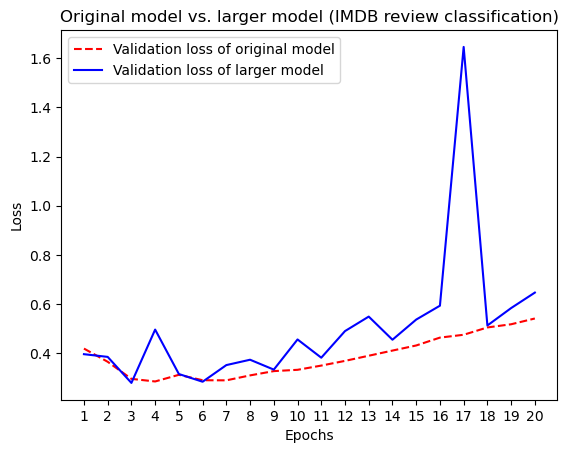

In [30]:
original_val_loss = history_original.history["val_loss"]
larger_model_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    larger_model_val_loss,
    "b-",
    label="Validation loss of larger model",
)
plt.title("Original model vs. larger model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

**규제 기법 2: 가중치 규제**

아래 코드는 IMDB 훈련 모델에 L2 규제를 가한 결과를 보여준다.

- `regularizers.l2(0.002)`: 각 가중치의 제곱에 0.002 곱하기
- 규제는 훈련 중에만 적용되며 테스트에는 사용되지 않음.

In [31]:
from keras.regularizers import l2

model = keras.Sequential(
    [
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7854 - loss: 0.6112 - val_accuracy: 0.8526 - val_loss: 0.4971
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8883 - loss: 0.4154 - val_accuracy: 0.8727 - val_loss: 0.4107
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9083 - loss: 0.3427 - val_accuracy: 0.8699 - val_loss: 0.3960
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9223 - loss: 0.3061 - val_accuracy: 0.8846 - val_loss: 0.3693
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9288 - loss: 0.2830 - val_accuracy: 0.8824 - val_loss: 0.3705
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.2715 - val_accuracy: 0.8789 - val_loss: 0.3735
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.2574 - val_accuracy: 0.8815 - val_loss: 0.3682
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9417 - loss: 0.2514 - val_accuracy: 0.8847 - val_loss

L2 규제를 가한 결과는 다음과 같다.

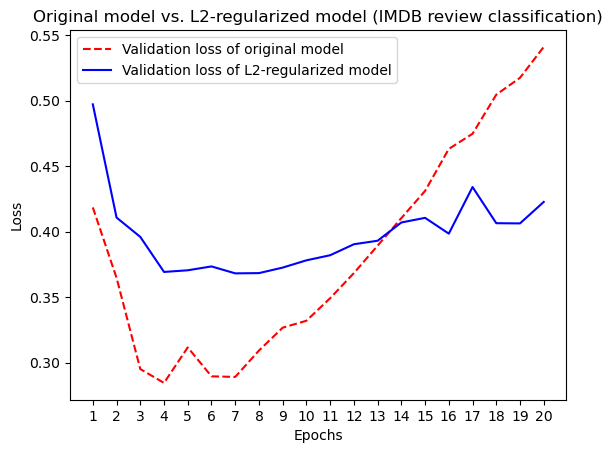

In [32]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    l2_val_loss,
    "b-",
    label="Validation loss of L2-regularized model",
)
plt.title(
    "Original model vs. L2-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

L1, L2 규제는 실제로는 `regularizers` 모듈의 클래스로 정의된다.

In [33]:
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

**규제 기법 3: 드롭아웃 적용**

아래 코드는 IMDB 데이터셋에 드롯아웃을 적용하여 훈련한다.

In [34]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5989 - loss: 0.6597 - val_accuracy: 0.7838 - val_loss: 0.5879
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7181 - loss: 0.5633 - val_accuracy: 0.8612 - val_loss: 0.4659
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7746 - loss: 0.4858 - val_accuracy: 0.8784 - val_loss: 0.3891
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8223 - loss: 0.4191 - val_accuracy: 0.8850 - val_loss: 0.3312
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8565 - loss: 0.3665 - val_accuracy: 0.8855 - val_loss: 0.3159
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8821 - loss: 0.3215 - val_accuracy: 0.8897 - val_loss: 0.2905
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.2924 - val_accuracy: 0.8909 - val_loss: 0.2778
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9127 - loss: 0.2639 - val_accuracy: 0.8903 - val_loss

50%의 드롭아웃을 적용한 결과는 다음과 같다.

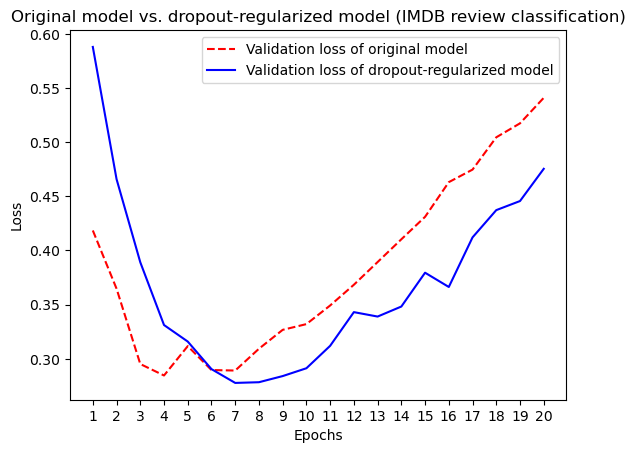

In [35]:
original_val_loss = history_original.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    dropout_val_loss,
    "b-",
    label="Validation loss of dropout-regularized model",
)
plt.title(
    "Original model vs. dropout-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()